In [1]:
from skimage.color import rgb2gray, rgb2lab, deltaE_cie76
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

In [3]:
lastYearImg = [
                'NEON.D01.HARV.DP1.00042_2021_01_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_02_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_03_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_04_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_05_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_06_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_07_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_08_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_09_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_10_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_11_01.jpg', 
                'NEON.D01.HARV.DP1.00042_2021_12_01.jpg',
              ]

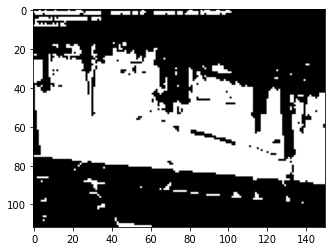

In [4]:
# make ground mask based on Feb-Mar snow
imgFeb = cv2.imread('./NEON.D01.HARV.DP1.00042_2021_02_01.jpg')
imgMar = cv2.imread('./NEON.D01.HARV.DP1.00042_2021_03_01.jpg')
imgFeb = cv2.cvtColor(imgFeb, cv2.COLOR_BGR2RGB)
imgMar = cv2.cvtColor(imgMar, cv2.COLOR_BGR2RGB)
hsv_imgFeb = cv2.cvtColor(imgFeb, cv2.COLOR_RGB2HSV)
hsv_imgMar = cv2.cvtColor(imgMar, cv2.COLOR_RGB2HSV)
maskFeb = cv2.inRange(hsv_imgFeb, (0,0,80), (172,111,255))
maskMar = cv2.inRange(hsv_imgMar, (0,0,80), (172,111,255))
mask = cv2.bitwise_or(maskFeb, maskFeb, mask=maskMar)
plt.imshow(mask, cmap="gray")
plt.show()

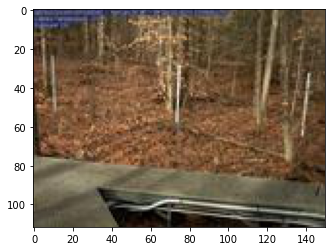

ground


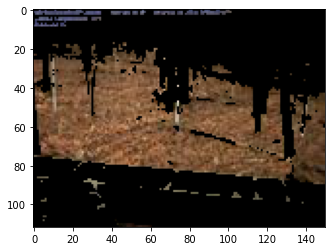

green in ground


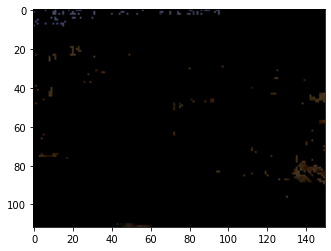

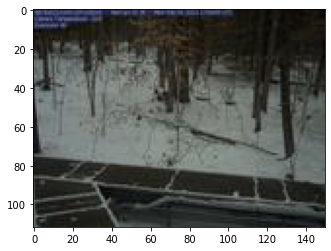

ground


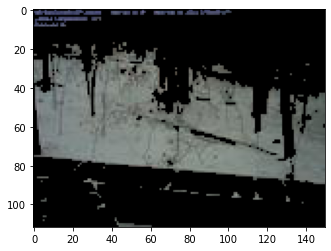

green in ground


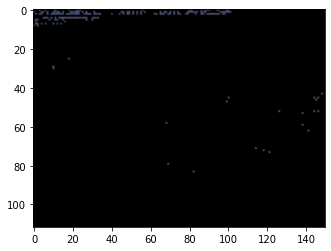

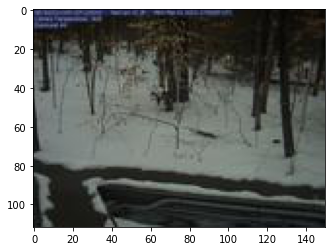

ground


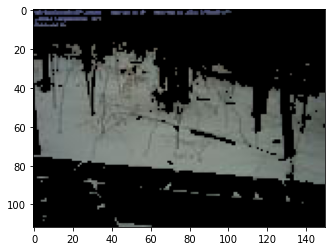

green in ground


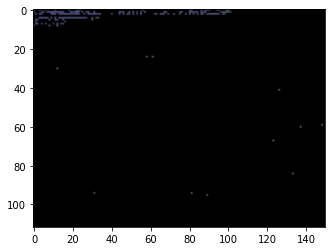

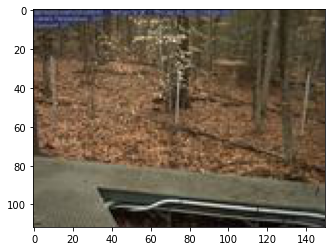

ground


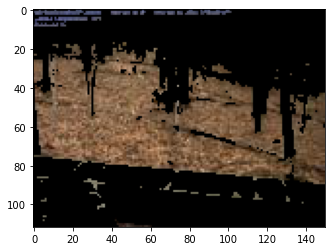

green in ground


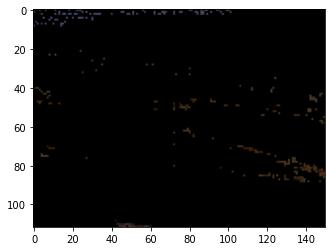

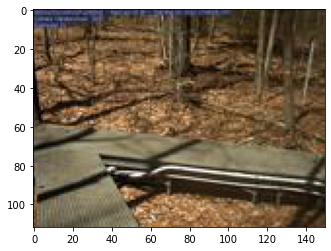

ground


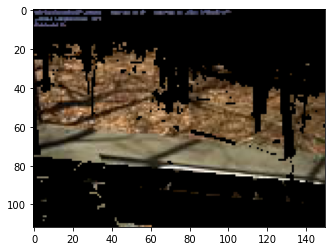

green in ground


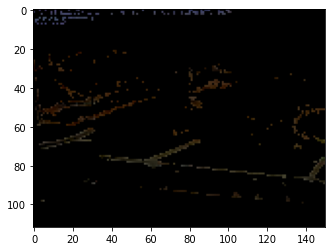

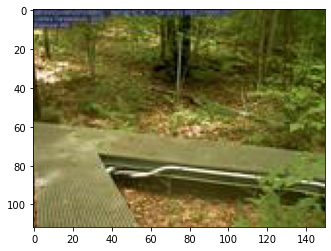

ground


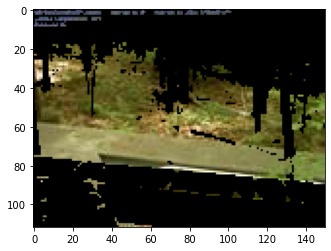

green in ground


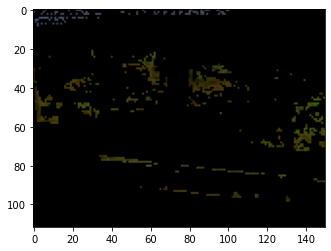

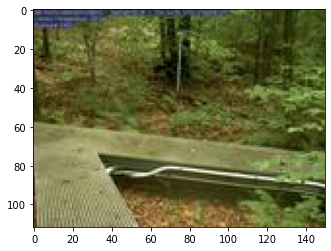

ground


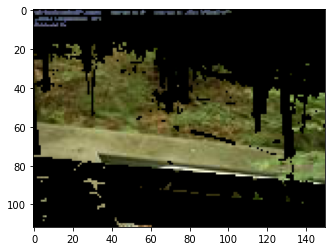

green in ground


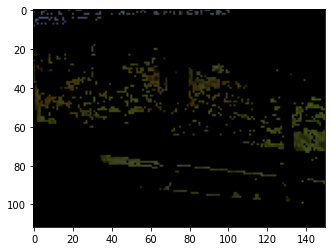

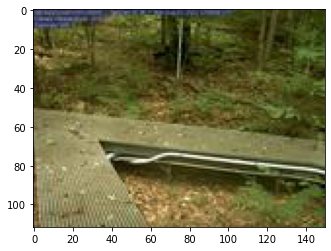

ground


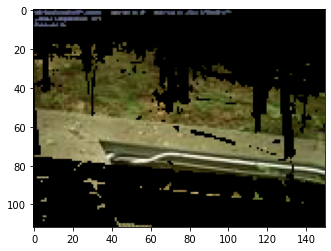

green in ground


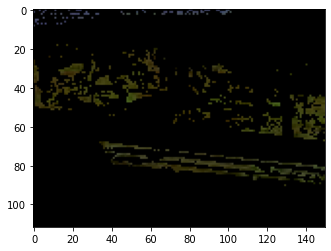

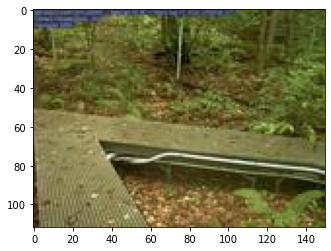

ground


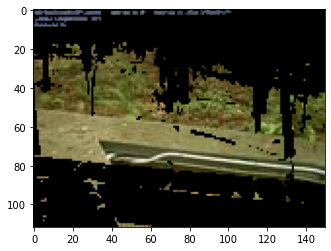

green in ground


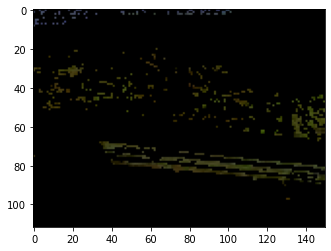

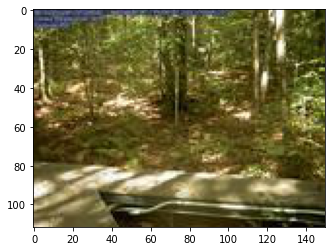

ground


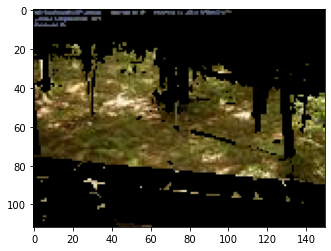

green in ground


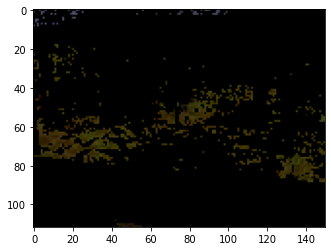

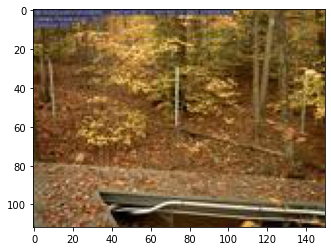

ground


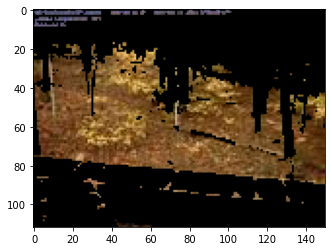

green in ground


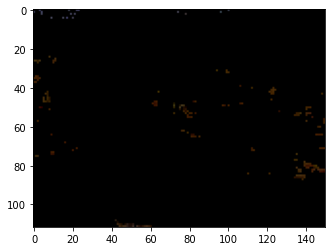

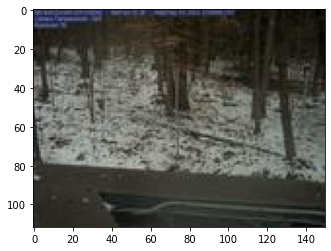

ground


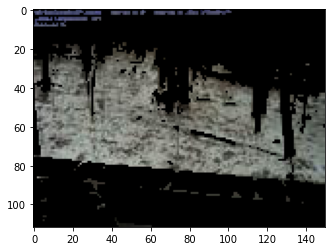

green in ground


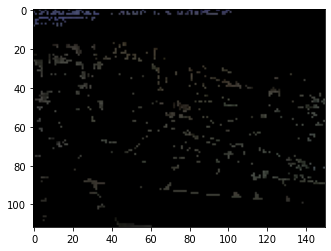

[0.31997704276847205, 0.29975742173963266, 0.2957667575993765, 0.31936470461984223, 0.33380651812044243, 0.42583420426833885, 0.42971459183331817, 0.4231017813507101, 0.42106204073580905, 0.41935538496274555, 0.3243190433389347, 0.33624328046559154]


In [11]:
green_over_time = []
red_over_time = []


for img_name in lastYearImg:
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    print("ground")
    result = cv2.bitwise_and(img, img, mask = mask)
    plt.imshow(result)
    plt.show()
                             
    print("green in ground")
    greenness = cv2.inRange(result, (20, 0, 0), (74, 255,255))
    after_green_result = cv2.bitwise_and(result, result, mask = greenness)
    plt.imshow(after_green_result)
    plt.show()
    h, w = img.shape[:2]
    # find g/g+r+b
    red = np.sum(after_green_result[:,:,0])
    green = np.sum(after_green_result[:,:,1])
    blue = np.sum(after_green_result[:,:,2])
    
    green_over_time.append(green/(green+red+blue))
    red_over_time.append(red/(red+green+blue))
    
    ##############
    
    #green_over_time.append(np.count_nonzero(after_green_result)/(h*w))

print(over_time)




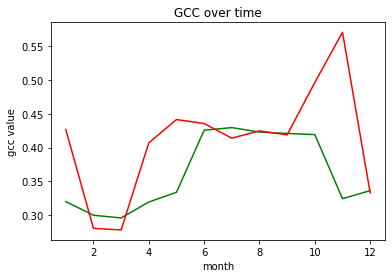

In [13]:
#print g/g+r+b plot
plt.title("GCC over time")
plt.xlabel("month")
plt.ylabel("gcc value")
plt.plot(np.arange(1,13), green_over_time, color="green")
plt.plot(np.arange(1,13), red_over_time, color="red")
plt.show()

# green plot for canopy (one/week)  || derivative of green (previous - current week) changes in greeness || 
